In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10683.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10736.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10489.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10512.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10975.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10064.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10281.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10384.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10986.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10870.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10786.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10268.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10760.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10759.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_11008

In [2]:
import tensorflow as tf

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/waste-classification-data/DATASET/TRAIN',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 22564 files belonging to 2 classes.
Using 18052 files for training.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/waste-classification-data/DATASET/TRAIN',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 22564 files belonging to 2 classes.
Using 4512 files for validation.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [6]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [7]:
training_set.class_names

['O', 'R']

In [8]:
validation_set.class_names

['O', 'R']

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
#Building Convolution MaxPooling Layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[150,150,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[150,150,3]))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[150,150,3]))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[150,150,3]))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1024,activation='relu'))

In [17]:
#Output Layer
model.add(Dense(units=2,activation='softmax'))

In [18]:
#compiling model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      12,846,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           2,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,020,386 (53.48 MB)

 Trainable params: 14,020,386 (53.48 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.7559 - loss: 3.3934 - val_accuracy: 0.8169 - val_loss: 0.4532
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.8280 - loss: 0.4096 - val_accuracy: 0.8056 - val_loss: 0.4618
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.8475 - loss: 0.3660 - val_accuracy: 0.8648 - val_loss: 0.3287
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.8637 - loss: 0.3375 - val_accuracy: 0.8613 - val_loss: 0.3448
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.8650 - loss: 0.3335 - val_accuracy: 0.8723 - val_loss: 0.3246
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.8743 - loss: 0.3178 - val_accuracy: 0.8562 - val_loss: 0.3640
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.8864 - loss: 0.3013 - val_accuracy: 0.8282 - val_loss: 0.4922
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.8855 - loss: 0.2905 - 

In [22]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

565/565 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9088 - loss: 0.2456
Training accuracy: 0.9108685851097107


In [23]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8704 - loss: 0.3198
Validation accuracy: 0.8745567202568054


In [24]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7903279662132263,
  0.8328163027763367,
  0.8493795990943909,
  0.8630068898200989,
  0.8623974919319153,
  0.8698205351829529,
  0.8814535737037659,
  0.8837801814079285,
  0.8846665024757385,
  0.8907046318054199],
 'loss': [0.9534391760826111,
  0.3968745172023773,
  0.36172372102737427,
  0.3340790867805481,
  0.3363483250141144,
  0.3209912180900574,
  0.2996370792388916,
  0.2931499779224396,
  0.29858455061912537,
  0.27492281794548035],
 'val_accuracy': [0.8169326186180115,
  0.8056294322013855,
  0.8648049831390381,
  0.861258864402771,
  0.8723404407501221,
  0.85616135597229,
  0.8282358050346375,
  0.8769946694374084,
  0.8772163391113281,
  0.8745567202568054],
 'val_loss': [0.45318761467933655,
  0.4617699086666107,
  0.32871633768081665,
  0.3447519540786743,
  0.3245672285556793,
  0.36404380202293396,
  0.4922322630882263,
  0.31405043601989746,
  0.3159943222999573,
  0.31722334027290344]}

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
import matplotlib.pyplot as plt

In [28]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


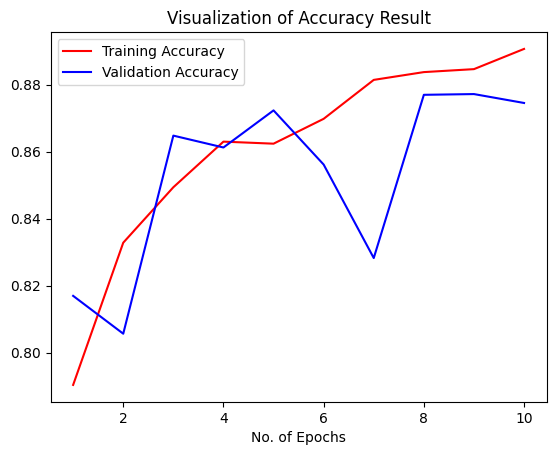

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [30]:
class_name = validation_set.class_names

In [31]:
class_name

['O', 'R']

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/waste-classification-data/DATASET/TEST',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(150, 150),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2513 files belonging to 2 classes.


In [38]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2513/2513 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [41]:
print(Y_true)

tf.Tensor([0 0 0 ... 1 1 1], shape=(2513,), dtype=int64)


In [42]:
import cv2

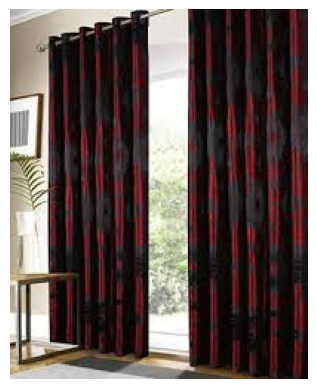

In [43]:
image_path = '/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10029.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img)
plt.axis('off')
plt.show()

In [46]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 150, 150, 3)


In [47]:
prediction = model.predict(input_arr)
prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


(1, 2)

In [48]:
result_index = np.argmax(prediction)
result_index

1

In [49]:
class_name = ['organic', 'recyclable']
class_name[result_index]

'recyclable'

In [50]:
model.save("model_final_1.keras")